In [1]:
import os, sys
# import sklearn as skl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
business_df = pd.read_excel('NNDR_for_Joe.xlsx',sheet_name=0)
business_df.keys()

Index(['name1', 'name2', 'addr1', 'addr2', 'addr3', 'addr4', 'postcode',
       'acct_id', 'ck', 'prop', 'rv', 'vo_propdescrip', 'baddr1', 'baddr2',
       'baddr3', 'baddr4', 'prop_postcode', 'empty_prop', 'empty_from'],
      dtype='object')

In [3]:
business_df=business_df.drop(['addr1','addr2','addr3','addr4','postcode','baddr1', 'baddr2',
       'baddr3', 'baddr4','prop_postcode'],axis=1)

In [4]:
business_df['prop'].value_counts().head()

4655103    1
2811174    1
2637109    1
2783042    1
2723123    1
Name: prop, dtype: int64

In [5]:
balance_df = pd.read_excel('NNDR_for_Joe.xlsx',sheet_name=1)
balance_df.head(2)

,propref,fin_year,status,account_id,check_digit,account_holder1,account_holder2,paymeth_code,trans_code,bill_no,...,last_payment,fullaccountref,account_bal,name1,name2,addr1,addr2,addr3,addr4,postcode
0,1001001,200910,NaN,60105948,X,MR ROYSTON LE COINTE,NaN,DDM01,DD,9,...,2011-10-26,60105948X,2.00,NaN,NaN,2ND FLR UNIT 201 COLOURWORKS,2 ABBOT STREET,LONDON,NaN,E8 3DP
1,1001001,201718,,60179497,5,DMD CAPITAL LIMITED,NaN,CSM01,SORD,1,...,2018-02-14,601794975,-97.01,NaN,NaN,2ND FLR UNIT 201 COLOURWORKS,2 ABBOT STREET,LONDON,NaN,E8 3DP


In [6]:
balance_df['name2'].value_counts()

Series([], Name: name2, dtype: int64)

In [7]:
balance_df.keys()

Index(['propref', 'fin_year', 'status', 'account_id', 'check_digit',
       'account_holder1', 'account_holder2', 'paymeth_code', 'trans_code',
       'bill_no', 'bill_bal', 'last_payment', 'fullaccountref', 'account_bal',
       'name1', 'name2', 'addr1', 'addr2', 'addr3', 'addr4', 'postcode'],
      dtype='object')

In [8]:
balance_df=balance_df.drop(['account_holder1','account_holder2','name1', 'name2', 'addr1', 'addr2', 'addr3', 'addr4', 'postcode'],axis=1)
balance_df.head(2)

,propref,fin_year,status,account_id,check_digit,paymeth_code,trans_code,bill_no,bill_bal,last_payment,fullaccountref,account_bal
0,1001001,200910,NaN,60105948,X,DDM01,DD,9,2.00,2011-10-26,60105948X,2.00
1,1001001,201718,,60179497,5,CSM01,SORD,1,-96.99,2018-02-14,601794975,-97.01


In [9]:
address_df = pd.read_excel('NNDR_for_Joe.xlsx',sheet_name=2)
address_df.head(2)

,UPRN,organisation,start_date,entry_date,last_update_date,end_date,address,postcode_master,nndr_prop_ref,llpg_usage,Ward
0,10008223002,GUNNERS NEWSAGENTS,20060214,20060214,20170823,0,"GUNNERS NEWSAGENTS, 33 BLACKSTOCK ROAD, HACKNE...",N4 2JF,1329285,"Commercial, Retail, Shop / Showroom",BROWNSWOOD
1,10008223003,NaN,20060214,20060214,20150218,0,"127 BLACKSTOCK ROAD, HACKNEY, LONDON, N4 2JW",N4 2JW,1329861,"Commercial, Retail, Shop / Showroom",BROWNSWOOD


In [10]:
address_df.keys()

Index(['UPRN', 'organisation', 'start_date', 'entry_date', 'last_update_date',
       'end_date', 'address', 'postcode_master', 'nndr_prop_ref', 'llpg_usage',
       'Ward'],
      dtype='object')

In [11]:
address_df = address_df.drop(['organisation', 'address'],axis=1)

### Now merging dataframes: making sure the matching key is the same format in both dataframes

In [12]:
business_df['prop']=business_df['prop'].apply(str)
business_df['prop'].head()

0    4611210
1    1515103
2    2121408
3    4055035
4    2759032
Name: prop, dtype: object

In [13]:
address_df['nndr_prop_ref']=address_df['nndr_prop_ref'].apply(str)
address_df['nndr_prop_ref'].head(5)

0    1329285
1    1329861
2    3284130
3    1619238
4    2447098
Name: nndr_prop_ref, dtype: object

In [14]:
combined_df = pd.merge(business_df, address_df,  how = 'inner', left_on = 'prop', right_on = 'nndr_prop_ref')

In [15]:
combined_df.head(2)

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
0,!K7 RECORDS GMBH,NaN,60161467,8,4611210,11500,WORKSHOP AND PREMISES,NaN,NaT,10008332636,20121001,20121001,20141006,0,E8 3FN,4611210,"Commercial, Industrial, Workshop / Light Indus...",LONDON FIELDS
1,& SMITH LIMITED,NaN,60162485,3,1515103,19500,OFFICES AND PREMISES,Y,2001-09-08,10008241663,20060214,20060214,20121017,0,N16 9AE,1515103,"Commercial, Offices, Offices and work studios",CLISSOLD


In [16]:
combined_df.shape

(10328, 18)

In [17]:
business_df.shape, address_df.shape

((10823, 9), (13126, 9))

In [18]:
balance_df.shape

(26686, 12)

In [19]:
combined_df2 = pd.merge(combined_df, balance_df,  how = 'inner', left_on = 'acct_id', right_on = 'account_id', suffixes =['','_2'])
combined_df2.shape

(10849, 30)

In [20]:
combined_df2.columns

Index(['name1', 'name2', 'acct_id', 'ck', 'prop', 'rv', 'vo_propdescrip',
       'empty_prop', 'empty_from', 'UPRN', 'start_date', 'entry_date',
       'last_update_date', 'end_date', 'postcode_master', 'nndr_prop_ref',
       'llpg_usage', 'Ward', 'propref', 'fin_year', 'status', 'account_id',
       'check_digit', 'paymeth_code', 'trans_code', 'bill_no', 'bill_bal',
       'last_payment', 'fullaccountref', 'account_bal'],
      dtype='object')

In [21]:
# print(address_df.shape)
print(address_df['nndr_prop_ref'].value_counts().head(3))

nan        1018
4749202       4
1943742       3
Name: nndr_prop_ref, dtype: int64


In [22]:
address_df[address_df['nndr_prop_ref']=='4749202']

,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
3207,10008309586,20070213,20070213,20171002,0,N4 2SH,4749202,"Commercial, Education, Primary, Junior, Infant...",WOODBERRY DOWN
3489,10008313946,20071018,20071018,20121017,0,N4 2TW,4749202,"Commercial, Education, Secondary School",WOODBERRY DOWN
8509,10008463792,20060424,20060424,20121017,0,N4 2TW,4749202,"Commercial, Education, Nursery/creche",WOODBERRY DOWN
11245,100023186270,20060214,20060214,20150218,0,N4 2TW,4749202,"Commercial, Education, Primary, Junior, Infant...",WOODBERRY DOWN


In [23]:
combined_df[combined_df['nndr_prop_ref']=='4749202']

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
645,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01,10008309586,20070213,20070213,20171002,0,N4 2SH,4749202,"Commercial, Education, Primary, Junior, Infant...",WOODBERRY DOWN
646,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01,10008313946,20071018,20071018,20121017,0,N4 2TW,4749202,"Commercial, Education, Secondary School",WOODBERRY DOWN
647,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01,10008463792,20060424,20060424,20121017,0,N4 2TW,4749202,"Commercial, Education, Nursery/creche",WOODBERRY DOWN
648,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01,100023186270,20060214,20060214,20150218,0,N4 2TW,4749202,"Commercial, Education, Primary, Junior, Infant...",WOODBERRY DOWN


In [24]:
business_df[business_df['prop']=='4749202']

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from
684,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01


In [25]:
address_df[address_df['nndr_prop_ref']=='1943742']       

,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
8466,10008463072,20060424,20060424,20141117,0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK
8467,10008463073,20060424,20060424,20141117,0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK
8618,100021036411,20060214,20060214,20121017,0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK


In [26]:
business_df[business_df['prop']=='1943742']

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from
9708,THE HEAD TEACHER,NaN,60087672,8,1943742,97000,SCHOOL AND PREMISES,NaN,NaT


In [27]:
combined_df[combined_df['nndr_prop_ref']=='1943742']

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
9245,THE HEAD TEACHER,NaN,60087672,8,1943742,97000,SCHOOL AND PREMISES,NaN,NaT,10008463072,20060424,20060424,20141117,0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK
9246,THE HEAD TEACHER,NaN,60087672,8,1943742,97000,SCHOOL AND PREMISES,NaN,NaT,10008463073,20060424,20060424,20141117,0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK
9247,THE HEAD TEACHER,NaN,60087672,8,1943742,97000,SCHOOL AND PREMISES,NaN,NaT,100021036411,20060214,20060214,20121017,0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK


In [28]:
combined_df2.keys()

Index(['name1', 'name2', 'acct_id', 'ck', 'prop', 'rv', 'vo_propdescrip',
       'empty_prop', 'empty_from', 'UPRN', 'start_date', 'entry_date',
       'last_update_date', 'end_date', 'postcode_master', 'nndr_prop_ref',
       'llpg_usage', 'Ward', 'propref', 'fin_year', 'status', 'account_id',
       'check_digit', 'paymeth_code', 'trans_code', 'bill_no', 'bill_bal',
       'last_payment', 'fullaccountref', 'account_bal'],
      dtype='object')

In [29]:
combined_df2.fin_year.value_counts()

201819    7391
201718    1209
201617     680
201516     356
201415     249
201011     207
201112     195
201314     156
201213     155
200910      64
200809      45
200708      41
200607      34
200102      11
199798      10
199697       9
200203       7
199899       7
199596       6
200304       5
200506       5
200001       4
199900       2
200405       1
Name: fin_year, dtype: int64

In [30]:
combined_df3=combined_df2[combined_df2['fin_year']==201819.0]

In [31]:
combined_df3.shape

(7391, 30)

In [32]:
combined_df3.keys()

Index(['name1', 'name2', 'acct_id', 'ck', 'prop', 'rv', 'vo_propdescrip',
       'empty_prop', 'empty_from', 'UPRN', 'start_date', 'entry_date',
       'last_update_date', 'end_date', 'postcode_master', 'nndr_prop_ref',
       'llpg_usage', 'Ward', 'propref', 'fin_year', 'status', 'account_id',
       'check_digit', 'paymeth_code', 'trans_code', 'bill_no', 'bill_bal',
       'last_payment', 'fullaccountref', 'account_bal'],
      dtype='object')

In [33]:
combined_df3['vo_propdescrip'].str.upper();

In [34]:
combined_df3.Ward.value_counts()

HOXTON EAST AND SHOREDITCH    2219
HOXTON WEST                    772
LONDON FIELDS                  552
DALSTON                        471
STOKE NEWINGTON                375
HOMERTON                       329
HAGGERSTON                     317
HACKNEY CENTRAL                297
HACKNEY WICK                   245
LEA BRIDGE                     244
SPRINGFIELD                    225
DE BEAUVOIR                    200
SHACKLEWELL                    199
CLISSOLD                       187
VICTORIA                       148
CAZENOVE                       145
HACKNEY DOWNS                  135
BROWNSWOOD                      92
WOODBERRY DOWN                  85
STAMFORD HILL WEST              80
KINGS PARK                      74
Name: Ward, dtype: int64

In [35]:
#'start_date', 'entry_date', 'last_update_date',

In [36]:
# categorical: vo_propdescrip, empty_prop, 'llpg_usage', 'Ward','paymeth_code', 
# real-valued: .rv,  'bill_no',

#  real-valued: RV = rates value in GBP, number of bill (ie how long renting)
#  categorical: property description, whether its empty, how its used, ward its in, payment method 

combined_df4 = combined_df3[['rv','vo_propdescrip','empty_prop', 
                   'llpg_usage', 'Ward', 'paymeth_code','bill_no', 'account_bal']]

In [37]:
combined_df4.keys()

Index(['rv', 'vo_propdescrip', 'empty_prop', 'llpg_usage', 'Ward',
       'paymeth_code', 'bill_no', 'account_bal'],
      dtype='object')

In [38]:
combined_df4['empty_prop']=combined_df4['empty_prop'].fillna(0)
combined_df4['empty_prop']=combined_df4['empty_prop'].replace(['Y','V'],1)
combined_df4.head()

C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,rv,vo_propdescrip,empty_prop,llpg_usage,Ward,paymeth_code,bill_no,account_bal
0,19500,OFFICES AND PREMISES,1,"Commercial, Offices, Offices and work studios",CLISSOLD,DDM01,6,5124.0
10,11500,CLUB AND PREMISES,0,"Commercial, Leisure, Licensed private members’...",HACKNEY WICK,CSM01,23,10111.2
11,16000,COMMUNICATION STATION AND PREMISES,0,"Commercial, Utilities, Telecommunications masts",HAGGERSTON,CSH12,10,5760.0
12,16000,COMMUNICATION STATION AND PREMISES,0,"Commercial, Utilities, Telecommunications masts",HACKNEY WICK,CSH12,10,5760.0
13,16000,COMMUNICATION STATION AND PREMISES,0,"Commercial, Utilities, Telecommunications masts",STOKE NEWINGTON,CSH12,10,5760.0


In [39]:
combined_df4['bin_label']=combined_df4['account_bal'].apply(lambda x: 1 if float(x)<0 else 0)
combined_df4['bin_label'].value_counts()

C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    7203
1     188
Name: bin_label, dtype: int64

#### Dealing with too many different values in categorical data: llpg_usage and vo_propdescrip

In [40]:
combined_df5 = combined_df4.copy()
threshold=20

counts = combined_df5['llpg_usage'].value_counts()
repl = counts[counts <= threshold].index
# list of uncommon values to be created, taken by indexing the value_counts where count is sub-threshold
combined_df5['llpg_usage']=combined_df5['llpg_usage'].replace(repl, 'Other')
# combined_df5

In [41]:
counts = combined_df5['vo_propdescrip'].value_counts()
repl = counts[counts <= threshold].index
combined_df5['vo_propdescrip']=combined_df5['vo_propdescrip'].replace(repl, 'Other')
# combined_df5

In [42]:
ward_crosstab = pd.crosstab(combined_df4['Ward'],combined_df4['bin_label'])
ward_crosstab['neg_pctg']=ward_crosstab[1]/ward_crosstab[0]*100
ward_crosstab[ward_crosstab[1]>3].sort_values('neg_pctg',ascending=False)

bin_label,0,1,neg_pctg
Ward,,,
HOXTON WEST,720,52,7.222222
HACKNEY DOWNS,128,7,5.468750
DE BEAUVOIR,192,8,4.166667
CAZENOVE,140,5,3.571429
SHACKLEWELL,193,6,3.108808
HACKNEY WICK,238,7,2.941176
CLISSOLD,182,5,2.747253
DALSTON,459,12,2.614379
HOMERTON,321,8,2.492212


In [43]:
usage_ct = pd.crosstab(combined_df5['llpg_usage'],combined_df5['bin_label'])
usage_ct['neg_pctg']=usage_ct[1]/usage_ct[0]*100
usage_ct.sort_values('neg_pctg',ascending=False)

bin_label,0,1,neg_pctg
llpg_usage,,,
"Commercial, Education, Primary, Junior, Infants or Middle School",61,14,22.950820
"Commercial, Medical, General Practice Surgery / Clinic",37,7,18.918919
"Commercial, Community Services, Public / Village Hall / Other Community Facility",107,7,6.542056
"Commercial, Education, Nursery/creche",52,3,5.769231
"Commercial, Leisure, Indoor / Outdoor Leisure / Sporting Activity/ Centre",44,2,4.545455
"Commercial, Industrial, Warehouse / Store / Storage Depot",358,14,3.910615
"Commercial, Offices, Offices and work studios",2718,98,3.605592
"Commercial, Industrial, Workshop / Light Industrial",624,16,2.564103
Other,249,6,2.409639


In [46]:
descrip_ct =  pd.crosstab(combined_df5['vo_propdescrip'],combined_df5['bin_label'])
descrip_ct['neg_pctg']=descrip_ct[1]/(descrip_ct[0]+descrip_ct[1])*100
descrip_ct.sort_values('neg_pctg',ascending=False)

bin_label,0,1,neg_pctg
vo_propdescrip,,,
SURGERY AND PREMISES,29,7,19.444444
SCHOOL AND PREMISES,64,13,16.883117
HEALTH CENTRE AND PREMISES,20,2,9.090909
Offices and Premises,616,57,8.469539
DAY NURSERY AND PREMISES,39,3,7.142857
COMMUNITY CENTRE AND PREMISES,104,7,6.306306
STORE AND PREMISES,175,8,4.371585
Workshop and Premises,27,1,3.571429
BUSINESS UNIT AND PREMISES,299,10,3.236246




Let's see how many different features are required for each feature that we want to one-hot encode

In [47]:
for i in ['vo_propdescrip','empty_prop', 
                   'llpg_usage', 'Ward', 'paymeth_code']:
    print(i,(pd.get_dummies(combined_df4, columns=[i])).shape)

vo_propdescrip (7391, 361)
empty_prop (7391, 10)
llpg_usage (7391, 91)
Ward (7391, 29)
paymeth_code (7391, 18)


Too many dummy variables are required for prop description and usage - ie too many diff values. So don't use these

In [48]:
dummies_df = pd.get_dummies(combined_df4, columns=['Ward', 'paymeth_code'])
dummies_df = dummies_df.drop(['vo_propdescrip','llpg_usage'],axis=1)

In [49]:
(dummies_df.keys())

Index(['rv', 'empty_prop', 'bill_no', 'account_bal', 'bin_label',
       'Ward_BROWNSWOOD', 'Ward_CAZENOVE', 'Ward_CLISSOLD', 'Ward_DALSTON',
       'Ward_DE BEAUVOIR', 'Ward_HACKNEY CENTRAL', 'Ward_HACKNEY DOWNS',
       'Ward_HACKNEY WICK', 'Ward_HAGGERSTON', 'Ward_HOMERTON',
       'Ward_HOXTON EAST AND SHOREDITCH', 'Ward_HOXTON WEST',
       'Ward_KINGS PARK', 'Ward_LEA BRIDGE', 'Ward_LONDON FIELDS',
       'Ward_SHACKLEWELL', 'Ward_SPRINGFIELD', 'Ward_STAMFORD HILL WEST',
       'Ward_STOKE NEWINGTON', 'Ward_VICTORIA', 'Ward_WOODBERRY DOWN',
       'paymeth_code_CSH12', 'paymeth_code_CSHY', 'paymeth_code_CSM01',
       'paymeth_code_CSQ01', 'paymeth_code_DD12', 'paymeth_code_DD14',
       'paymeth_code_DDD14', 'paymeth_code_DDHY', 'paymeth_code_DDM01',
       'paymeth_code_DDQ01'],
      dtype='object')

Make a dictionary to store names of variables with their indices

In [50]:
feats_dict = dict()
for i, name in enumerate(dummies_df.keys()):
    feats_dict[i] = name 
# feats_dict

In [52]:
y = combined_df4[['bin_label']].copy()
X = dummies_df.drop(['bin_label','account_bal'], axis=1)

Feature ranking:
1. 	 rv                              (0.699114)
2. 	 bill_no                         (0.213590)
3. 	 empty_prop                      (0.017797)
4. 	 Ward_HOMERTON                   (0.014335)
5. 	 paymeth_code_DDD14              (0.006120)
6. 	 paymeth_code_CSH12              (0.005711)
7. 	 Ward_VICTORIA                   (0.003819)
8. 	 Ward_DALSTON                    (0.002922)
9. 	 Ward_HAGGERSTON                 (0.002562)
10. 	 Ward_CAZENOVE                   (0.002433)
11. 	 Ward_CLISSOLD                   (0.002353)
12. 	 Ward_LONDON FIELDS              (0.002318)
13. 	 Ward_HACKNEY CENTRAL            (0.002215)
14. 	 Ward_HACKNEY DOWNS              (0.002157)
15. 	 Ward_KINGS PARK                 (0.002048)
16. 	 Ward_SHACKLEWELL                (0.001972)
17. 	 bin_label                       (0.001870)
18. 	 Ward_STOKE NEWINGTON            (0.001764)
19. 	 Ward_SPRINGFIELD                (0.001682)
20. 	 Ward_HOXTON WEST                (0.001607)
21. 	 Ward_D

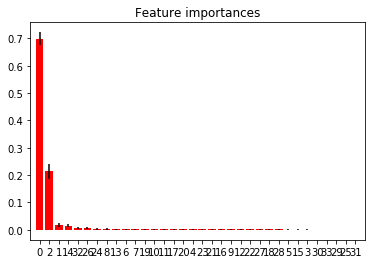

In [54]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y['bin_label'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. \t {} {} ({:3f})".format(f + 1, feats_dict[indices[f]], ' '*(30-len(feats_dict[indices[f]])),  importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Looking at following features:
- continuous/binary: rates value, bill number, whether the property is empty
- categorical (one-hot encoded): ward, payment code

The categorical features have so many diff values that they are less impactful compared to others.

To deal with this: let's combine types of usage. 


In [55]:
# combined_df5 merged all uncommon values into a single 'other' var; this is an alternative strategy
combined_df4['split_llpg1']=combined_df4['llpg_usage'].apply(lambda x: '-'.join(x.split(',')[1:2]))
combined_df4['split_llpg2']=combined_df4['llpg_usage'].apply(lambda x: '-'.join(x.split(',')[1:3]))
combined_df4.head()

C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,rv,vo_propdescrip,empty_prop,llpg_usage,Ward,paymeth_code,bill_no,account_bal,bin_label,split_llpg1,split_llpg2
0,19500,OFFICES AND PREMISES,1,"Commercial, Offices, Offices and work studios",CLISSOLD,DDM01,6,5124.0,0,Offices,Offices- Offices and work studios
10,11500,CLUB AND PREMISES,0,"Commercial, Leisure, Licensed private members’...",HACKNEY WICK,CSM01,23,10111.2,0,Leisure,Leisure- Licensed private members’ clubs
11,16000,COMMUNICATION STATION AND PREMISES,0,"Commercial, Utilities, Telecommunications masts",HAGGERSTON,CSH12,10,5760.0,0,Utilities,Utilities- Telecommunications masts
12,16000,COMMUNICATION STATION AND PREMISES,0,"Commercial, Utilities, Telecommunications masts",HACKNEY WICK,CSH12,10,5760.0,0,Utilities,Utilities- Telecommunications masts
13,16000,COMMUNICATION STATION AND PREMISES,0,"Commercial, Utilities, Telecommunications masts",STOKE NEWINGTON,CSH12,10,5760.0,0,Utilities,Utilities- Telecommunications masts


Now we can do crosstab on the more general version of llpg (ie more limited number of options)

In [ ]:
split_llpg_ct = pd.crosstab(combined_df4.split_llpg1, combined_df4.bin_label)
split_llpg_ct['neg_pc']=split_llpg_ct[1]/(split_llpg_ct[0]+split_llpg_ct[1])*100
print(split_llpg_ct.sort_values('neg_pc',ascending=False))
order=np.argsort(split_llpg_ct['neg_pc'])[::-1]
plt.bar(range(len(split_llpg_ct)),(split_llpg_ct['neg_pc'][order]))
plt.xticks(range(len(split_llpg_ct)),split_llpg_ct.index[order],rotation=90)
plt.ylabel('% of businesses in debt')

In [ ]:
combined_df6 = combined_df4.copy()
threshold=20
counts = combined_df6['split_llpg2'].value_counts()
repl = counts[counts <= threshold].index
# list of uncommon values to be created, taken by indexing the value_counts where count is sub-threshold
combined_df6['split_llpg2']=combined_df6['split_llpg2'].replace(repl, 'Other')
# combined_df5

In [ ]:
split_llpg_ct = pd.crosstab(combined_df6.split_llpg2, combined_df6.bin_label)
split_llpg_ct['neg_pc']=split_llpg_ct[1]/(split_llpg_ct[0]+split_llpg_ct[1])*100
print(split_llpg_ct.sort_values('neg_pc',ascending=False))
order=np.argsort(split_llpg_ct['neg_pc'])[::-1]
plt.bar(range(len(split_llpg_ct)),(split_llpg_ct['neg_pc'][order]))
plt.xticks(range(len(split_llpg_ct)),split_llpg_ct.index[order],rotation=90)
plt.ylabel('% of businesses in debt')

In [ ]:
def show_crosstab(feat):
    ct = pd.crosstab(combined_df6[feat], combined_df6.bin_label)
    ct['neg_pc']=ct[1]/(ct[0]+ct[1])*100
    print(ct.sort_values('neg_pc',ascending=False))    
    plt.bar(range(len(ct)),(ct['neg_pc']))
    plt.xticks(range(len(ct)),ct.index,rotation=90)
    plt.ylabel('% of businesses in debt')
    plt.xlabel(feat)
show_crosstab('bill_no')

In [ ]:
show_crosstab('empty_prop')

In [ ]:
show_crosstab('Ward')

In [ ]:
show_crosstab('paymeth_code')

In [ ]:
show_crosstab('rv')

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y['bin_label'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. \t {} {} ({:3f})".format(f + 1, feats_dict[indices[f]], ' '*(30-len(feats_dict[indices[f]])),  importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()